<a href="https://colab.research.google.com/github/waghmarevishesh/bank-load-modelling/blob/master/bank_load_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Titile: **Marketing Campaign for Banking Products**

## Objective: To predict the likelihood of a liability customer buying personal loans.
Data source: https://www.kaggle.com/itsmesunil/bank-loan-modelling/download

## **1. Importing the libraries required for EDA**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #visualization library
import seaborn as sns   #visualization library


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **2. Loading the dataset into Coloab**

In [5]:
url='https://raw.githubusercontent.com/waghmarevishesh/bank-load-modelling/master/data/Bank_Personal_Loan_Modelling.csv'
bank_data=pd.read_csv(url)

In [6]:
bank_data.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## **3. Checking the data, getting informations (datatypes, statistics, null values etc.)**

In [7]:
#To display datatype of each columns and also diplay the non null rows for each column.
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
#To diplay the summary stats of the data like min,max,count,mean,std etc values
bank_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [9]:
bank_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


## **4. Cleaning the data (dropping irrelevant columns, deleting negative values etc.)**

Dropoing the noises. ID column is being droppped as it has no signals. Also the experience column have some faulty values (negative values) so it is being dropeed as well.

In [10]:
#Checking the correlation between experience and Age
experience= bank_data['Experience']
age=bank_data['Age']
correlation = experience.corr(age)
correlation

0.9942148569683321

In [11]:
#Since Age and Experience are highly correlated which is nhot required for logistic regresion and also the experience has some faulty negative values so we will drop experience column
bank_data=bank_data.drop(['ID','Experience'],axis=1)
bank_data.head(5)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [12]:
bank_data.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [13]:
#As we can observe Zip Code is nominal as it has a lot of variation(unique values) values and in logistic regression such variables are not recommended, so we will drop the ZIP Code column too.
bank_data=bank_data.drop('ZIP Code',axis=1)

In [14]:
#cleaned data
bank_data.head(5)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [15]:
#The final shape of dataset
bank_data.shape

(5000, 11)

It has ***5000*** data entries and ***11*** columns (3 columns have been dropped)


## **5. Exploratory Data Analysis(EDA)**

In [16]:
#Number of customers with 0 as mortgage value
bank_data[bank_data['Mortgage']==0].shape[0]

3462

In [17]:
#No. of people with zero credit card spending per month (CCAvg)
bank_data[bank_data['CCAvg'] == 0].shape[0]

106

In [18]:
#taking observations from unique values in each colimns
bank_data.nunique()

Age                    45
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64



*    **There are 5 columns which have binary values (only 2 unique values)**
*   **Out of these Mortgage has maximum number of unique values**
*   **Family and Education are categorical type of features**
*   **Most of the people who have credit card do often use it** 




**Value counts**

In [19]:
columns=['Family','CD Account','Securities Account','Online','CreditCard','Education']
for i in columns:
  print(i,'\n',bank_data[i].value_counts(),'\n')

Family 
 1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64 

CD Account 
 0    4698
1     302
Name: CD Account, dtype: int64 

Securities Account 
 0    4478
1     522
Name: Securities Account, dtype: int64 

Online 
 1    2984
0    2016
Name: Online, dtype: int64 

CreditCard 
 0    3530
1    1470
Name: CreditCard, dtype: int64 

Education 
 1    2096
3    1501
2    1403
Name: Education, dtype: int64 



***Observations***


*   Most of the people don't use online services 
*   Most of the people who have credit card, do use it often
*   Much people don't have either a certificate of deposit (CD) account and secutrities account as well.
*   Most people lies under Undergrad(level 1) of Education feature 





**Univariate Analysis**

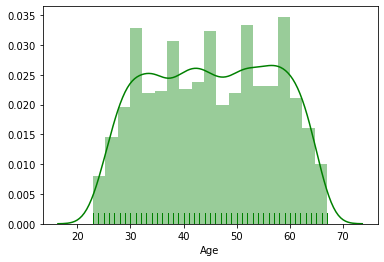

In [20]:

sns.distplot(bank_data['Age'],rug=True,color='green')  #symmatric distribution so colored green

**Observations**
*  The age range of 20-60 has most people under it.
*  It is not nominal like ZIP code. It seems symmetrically distributed.

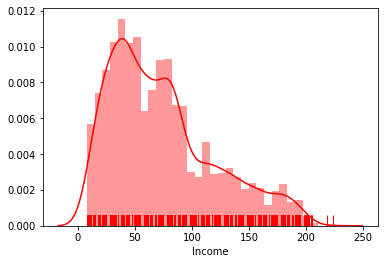

In [21]:
sns.distplot(bank_data['Income'],rug=True, color='red')   #skewed so coloured red

**observations**
*  Most customers have income ranging from 40-60k
*  From the graph and the describe info (mean>median) we can say thet the distribution is positively skewed.

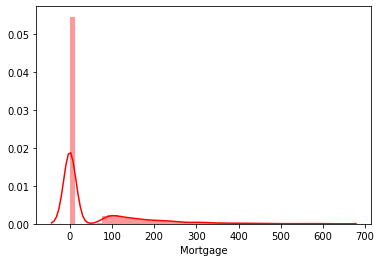

In [22]:
sns.distplot(bank_data['Mortgage'],color='red')

**observation**
*  Most people have zero as the mortgage value.
*  count tends to zero near mortgage value 350.


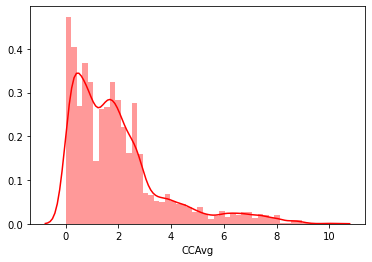

In [23]:
sns.distplot(bank_data['CCAvg'],color='red')

**observations**
* Most of the customers spend about 0-3K on credit cards per month.
* As the mean is little greater then median (from describe info) and also by observing the plot we can say that it is positively skewed.


**Categorical Plots and bars**

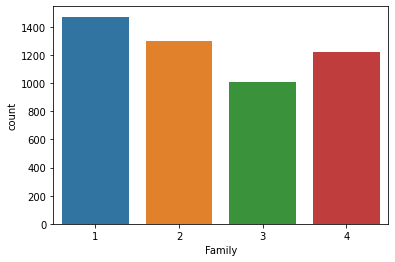

In [24]:
sns.countplot(bank_data['Family'])

* Maximum count=1

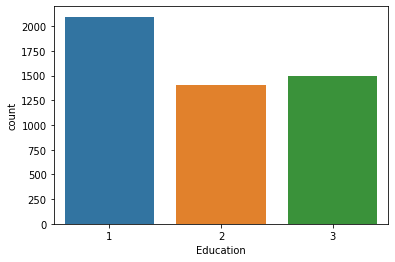

In [25]:
sns.countplot(bank_data['Education'])

*  Maximum Count=1

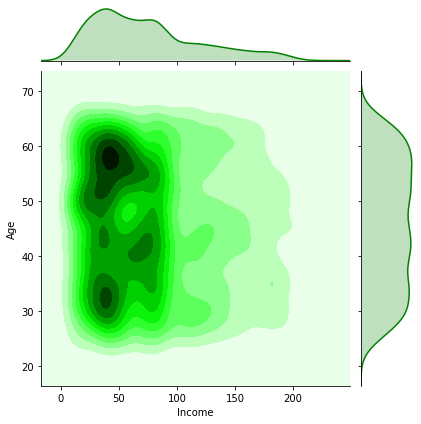

In [26]:

sns.jointplot(x='Income',y='Age',data=bank_data,kind='kde',color='green')

**Observations**
* Most people with Age around 50-60 has salary around 10-100k.


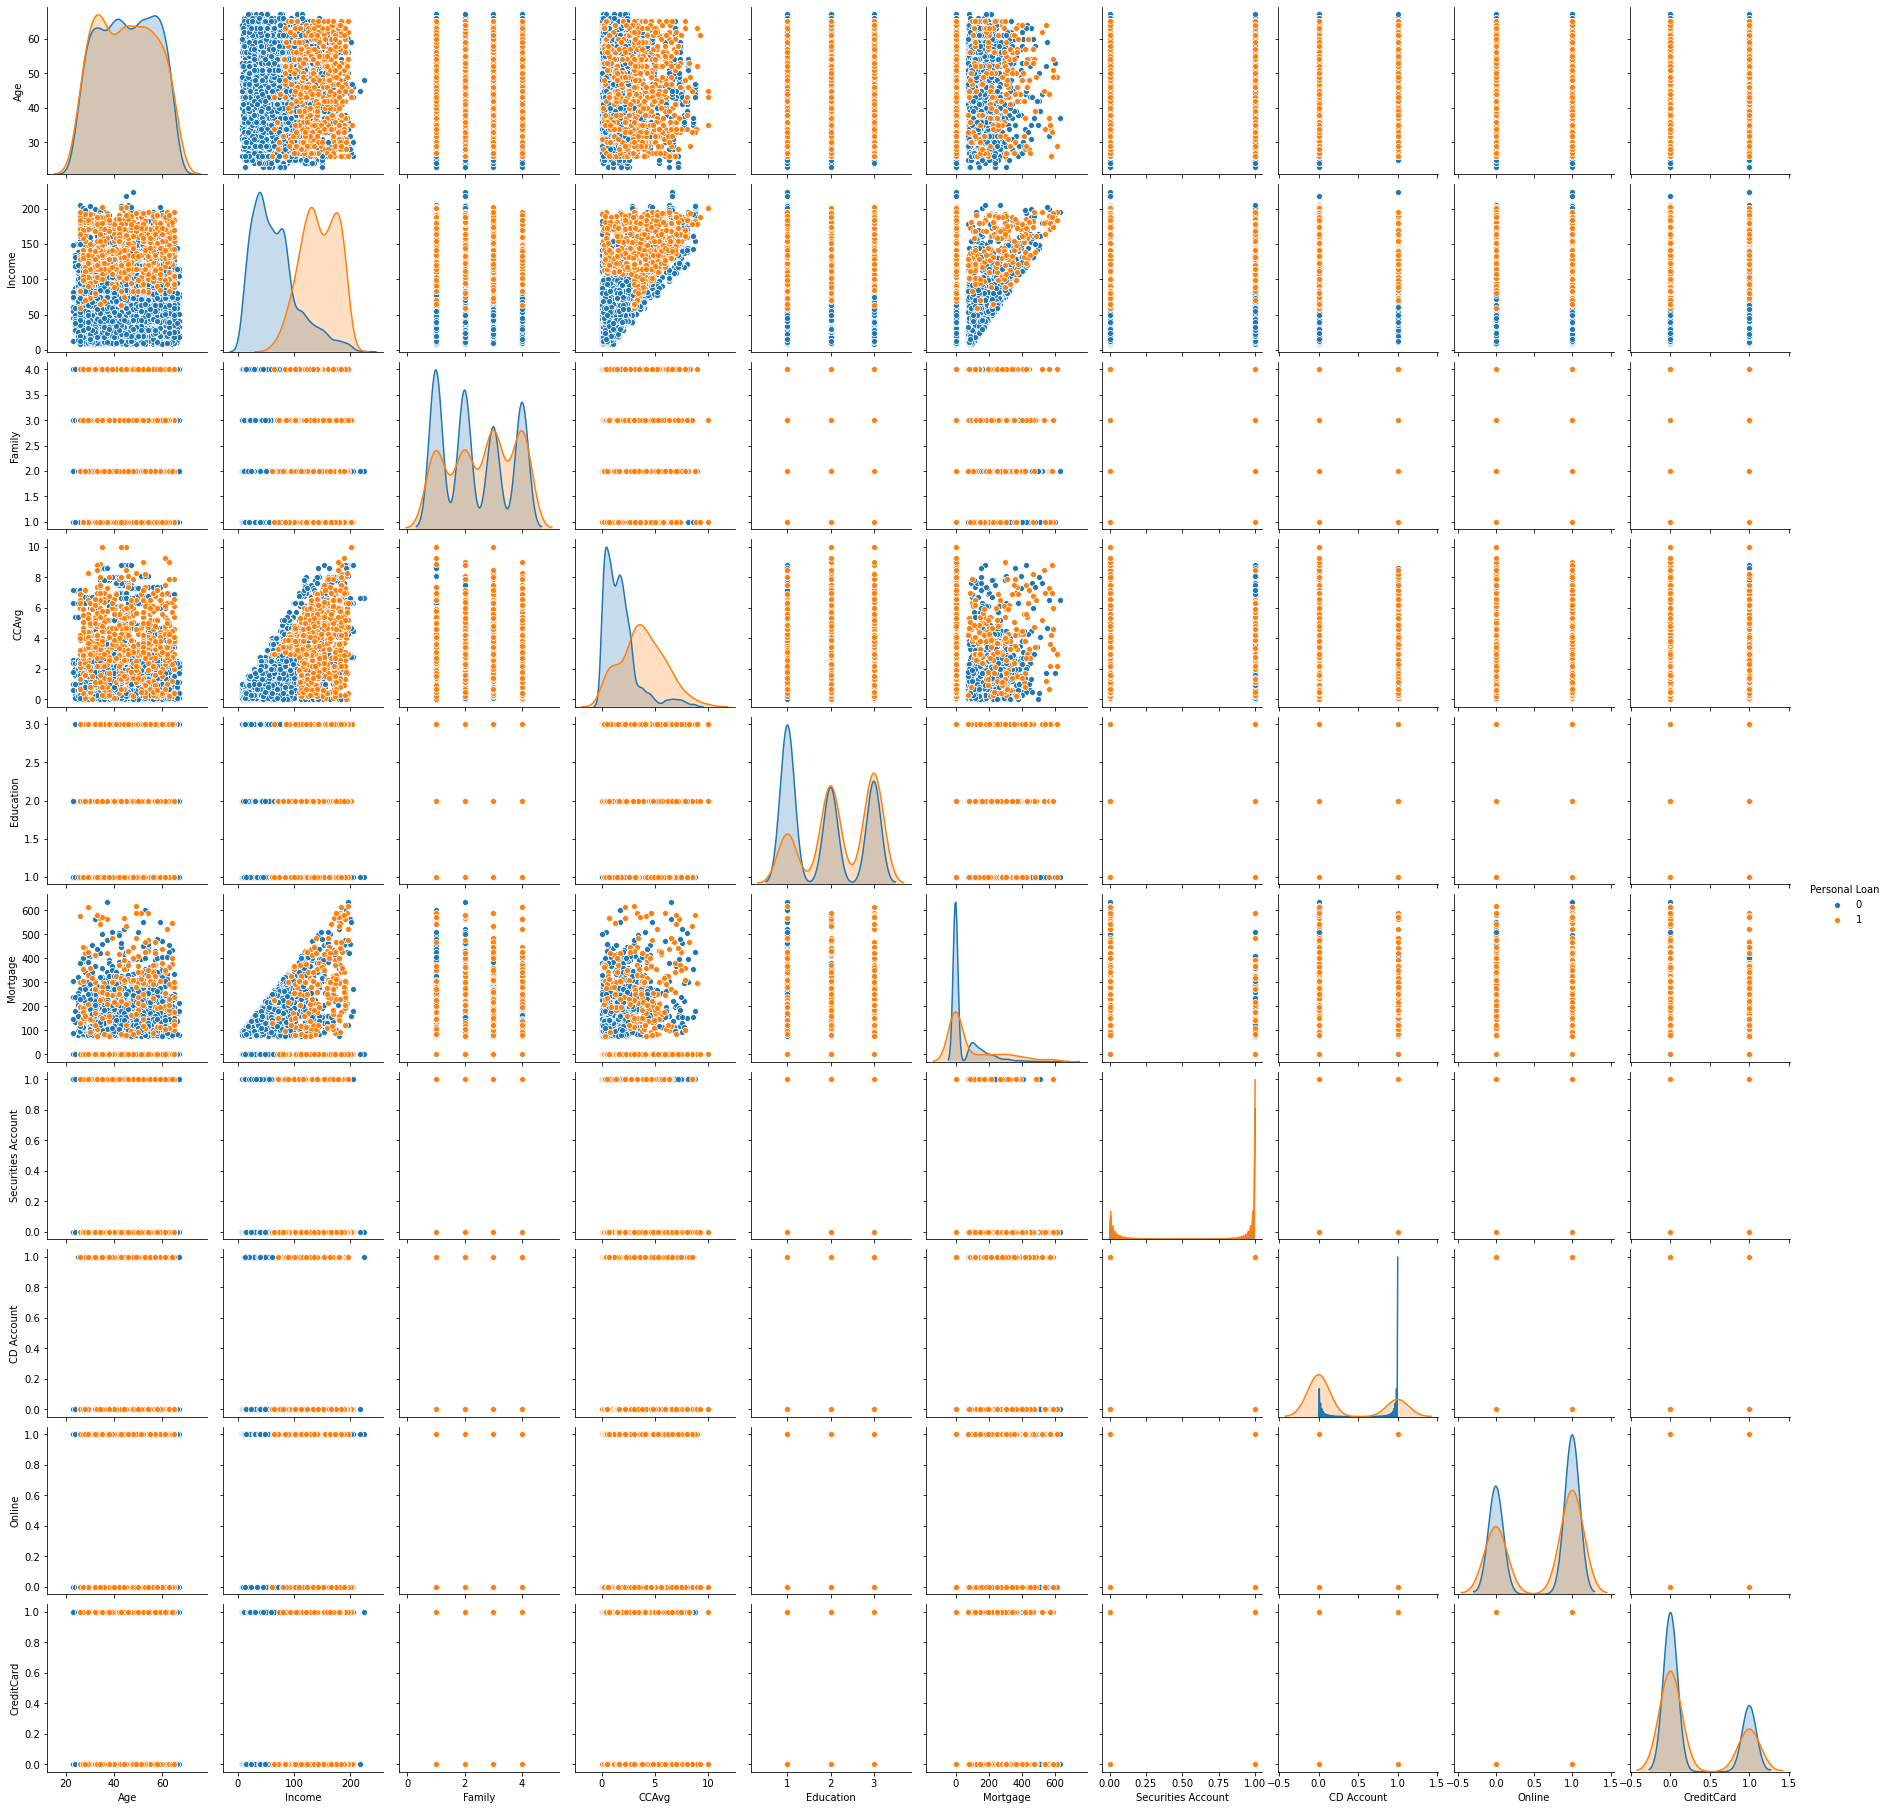

In [27]:
sns.pairplot(data=bank_data,hue='Personal Loan')

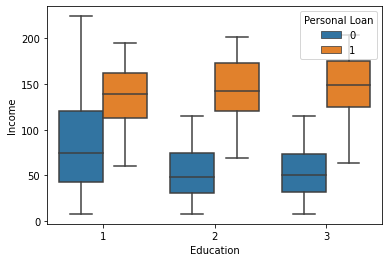

In [29]:
sns.boxplot(bank_data['Education'],bank_data['Income'],hue=bank_data['Personal Loan'])

**Observations**
* People with almost a particular similar amount of income have taken a personal loan


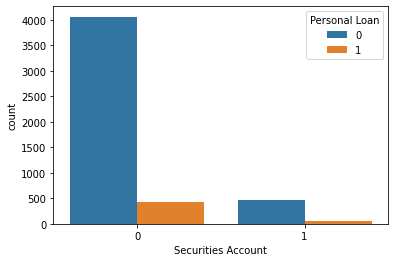

In [30]:

sns.countplot(x='Securities Account',data=bank_data,hue='Personal Loan')

**Observation**
* Majority of people having Securities Account don't have Personal Loan



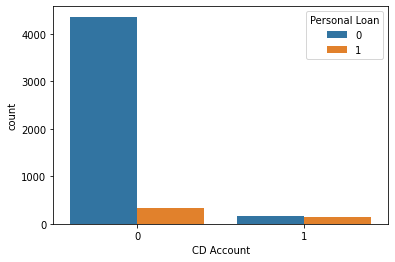

In [31]:
sns.countplot(x='CD Account',data=bank_data,hue='Personal Loan')

* In the case of CD Account too most people having CD account don't have Personal Loan. 

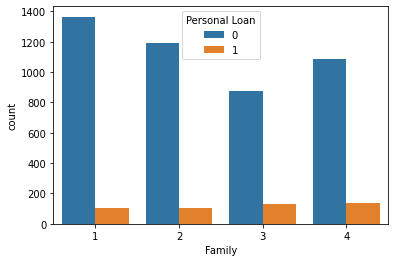

In [32]:
sns.countplot(x='Family',data=bank_data,hue='Personal Loan')

**Observation**
*  The variable family does not have much effect on the loan, but a family with three is more likely to take a loan.

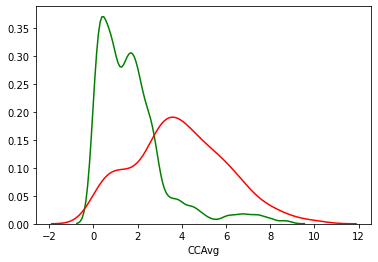

In [34]:
sns.distplot(bank_data[bank_data['Personal Loan']==0]['CCAvg'],hist=False,color='g')
sns.distplot(bank_data[bank_data['Personal Loan']==1]['CCAvg'],hist=False,color='r')


### **Correlation**

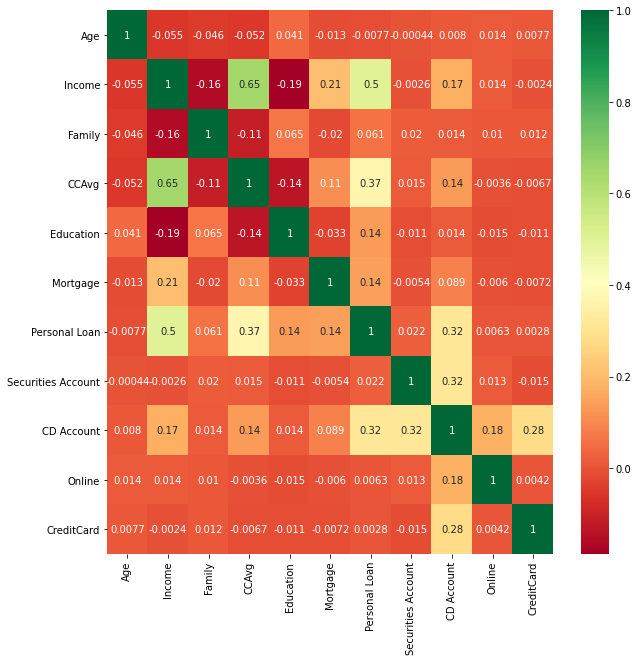

In [65]:
plt.subplots(figsize=(10,10))
sns.heatmap(bank_data.corr(),annot=True,cmap='RdYlGn')

**Observation**
* After Cleaning no vaiables have much correlation except CCAvg and Income have some correlation.

## **6. Transformation**

In [66]:
from sklearn.preprocessing import PowerTransformer
data_X=bank_data.drop("Personal Loan",axis=1)
data_Y=bank_data[['Personal Loan']]

In [67]:
data_X['Mortgage_Int']=pd.cut(data_X['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
data_X.drop('Mortgage',axis=1,inplace=True)

In [68]:
data_X.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,25,49,4,1.6,1,1,0,0,0,0
1,45,34,3,1.5,1,1,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,1,0


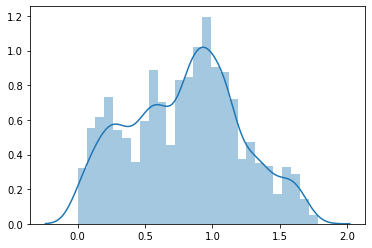

In [69]:
pt = PowerTransformer(method="yeo-johnson", standardize=False)
pt.fit(data_X["CCAvg"].values.reshape(-1,1))
graph = pt.transform(data_X["CCAvg"].values.reshape(-1,1))
sns.distplot(graph)

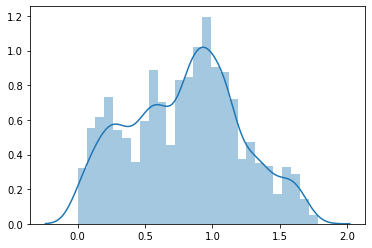

In [70]:
pt = PowerTransformer(method="yeo-johnson", standardize=False)
pt.fit(data_X["CCAvg"].values.reshape(-1,1))
temp = pt.transform(data_X["CCAvg"].values.reshape(-1,1))
sns.distplot(temp)

***All Features have been transformed to symmetrical distribution***

## **7. Normalisation And Splitting into Training and Testing set**

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
scaler = MinMaxScaler()
scaler.fit(data_X,data_Y)
scaler.transform(data_X)

array([[0.04545455, 0.18981481, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.12037037, 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.36363636, 0.01388889, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.90909091, 0.07407407, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.95454545, 0.18981481, 0.66666667, ..., 1.        , 0.        ,
        0.        ],
       [0.11363636, 0.34722222, 0.66666667, ..., 1.        , 1.        ,
        0.        ]])

Splitting data using stratified sampling

In [101]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [74]:


X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.3, stratify=data_Y, random_state=0)


## **8. Prediction Using different Moldels**

### **Logistic Regression**

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
#Scaling the data as per the warning
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)

In [95]:
#Applying scaling to test data
X_test_minmax = scaler.transform(X_test)

In [96]:
#testing the model again
logmodel = LogisticRegression()
logmodel.fit(X_train_minmax,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:

predictions=logistic_model.predict(X_test_minmax)

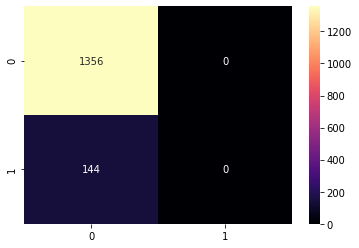

In [98]:
 sns.heatmap(confusion_matrix(y_test,predictions), annot=True, cmap='magma',fmt='d')

In [99]:
test_accuracy=logistic_model.score(X_test,y_test)
training_accuracy=logistic_model.score(X_train,y_train)
print('Accuracy of Training data:',round(test_accuracy,2))
print('Accuracy for Test data',round(training_accuracy,2))

Accuracy of Training data: 0.95
Accuracy for Test data 0.95


In [102]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1356
           1       0.00      0.00      0.00       144

    accuracy                           0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.82      0.90      0.86      1500



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### **Support Vector Classifier Model**

In [75]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [103]:
predictions = model.predict(X_test)

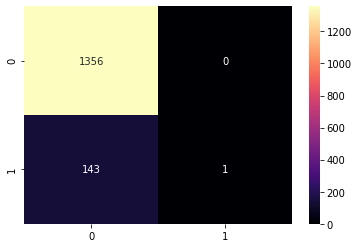

In [77]:
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, cmap='magma',fmt='d')

In [78]:
test_accuracy=model.score(X_train,y_train)
print('Accuracy for training set: ',round(test_accuracy,3))

Accuracy for training set:  0.905


In [109]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.86      0.92       144

    accuracy                           0.98      1500
   macro avg       0.98      0.93      0.95      1500
weighted avg       0.98      0.98      0.98      1500



In [79]:
train_accuracy=model.score(X_test,y_test)
print('Accuracy for test set:',round(train_accuracy,3))

Accuracy for test set: 0.905


## **Naive Bayes**

In [80]:
from sklearn.naive_bayes import GaussianNB


In [105]:

naive_model = GaussianNB()
naive_model.fit(X_train, y_train)

predictions = naive_model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


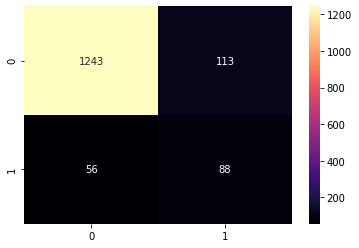

In [82]:
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, cmap='magma',fmt='d')

In [83]:
train_accuracy=naive_model.score(X_test,y_test)
print('Accuracy for test set:',round(train_accuracy,2))
test_accuracy=naive_model.score(X_train,y_train)
print('Accuracy for training set: ',round(test_accuracy,2))


Accuracy for test set: 0.89
Accuracy for training set:  0.88


In [106]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1356
           1       0.44      0.61      0.51       144

    accuracy                           0.89      1500
   macro avg       0.70      0.76      0.72      1500
weighted avg       0.91      0.89      0.90      1500



## **DecisionTreeClassifier Model**

In [84]:

from sklearn.tree import DecisionTreeClassifier

In [85]:
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [107]:

predictions = dtree.predict(X_test)

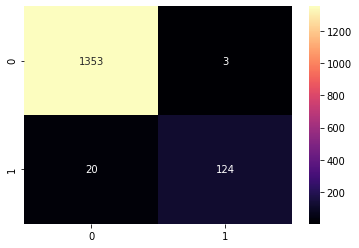

In [87]:
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, cmap='magma',fmt='d')

In [88]:
test_accuracy=dtree.score(X_test,y_test)
training_accuracy=dtree.score(X_train,y_train)
print('Accuracy of Training data:',round(test_accuracy,2))
print('Accuracy for Test data',round(training_accuracy,2))

Accuracy of Training data: 0.98
Accuracy for Test data 0.98


In [108]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.86      0.92       144

    accuracy                           0.98      1500
   macro avg       0.98      0.93      0.95      1500
weighted avg       0.98      0.98      0.98      1500



## **9. Conclusion**


The aim was to build a model that will help the Universal bank to identify the potential customers who have a higher probability of purchasing the loan.
Here, I have tried four different models to predict the likelihood of a customer buying personal loans.After observing the predictions of all the models (Classification Report Confusions matrix in heatmap form) it seems like **Decision Tree** Algorithm of predicting is most accurate as it has minimum Type 1 Error(False Positive) and Typre 2 Error(False Negative) as well.So we conclude that Decision tree model will be our selected model for prediction . 